In [2]:
import pandas as pd 
import numpy as np

In [20]:
X = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
X

array([[ 1. ,  1. ,  1.2],
       [ 1. ,  2. ,  2.1],
       [ 1. ,  3. ,  3.1],
       [ 1. ,  4. ,  4.1],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  6. ,  6. ],
       [ 1. ,  7. ,  7. ],
       [ 1. ,  8. ,  8. ],
       [ 1. ,  9. ,  9.1],
       [ 1. , 10. , 10.2]])

#### Infalted Standard Error.

In [21]:
np.dot(X.T, X)

array([[ 10.  ,  55.  ,  55.8 ],
       [ 55.  , 385.  , 389.  ],
       [ 55.8 , 389.  , 393.12]])

In [36]:
# condition number with multicollinear data.
condition_number = np.linalg.cond(np.dot(X.T, X))
print("Condition Number:", condition_number)

Condition Number: 29104.19736331761


In [22]:
np.linalg.inv(np.dot(X.T, X))

array([[  0.67713004,   1.89686099,  -1.97309417],
       [  1.89686099,  18.3309417 , -18.40807175],
       [ -1.97309417, -18.40807175,  18.49775785]])

In [38]:
# When no multicollinearity then Standard error is normal. 
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
arr

array([[ 1. ,  1. ,  2.4],
       [ 1. ,  2. ,  0.7],
       [ 1. ,  3. ,  4.3],
       [ 1. ,  4. ,  3.5],
       [ 1. ,  5. ,  1.6],
       [ 1. ,  6. ,  5.1],
       [ 1. ,  7. ,  6.9],
       [ 1. ,  8. ,  7.5],
       [ 1. ,  9. ,  8.1],
       [ 1. , 10. ,  9.8]])

In [40]:
# condition number when no multi-collinearity in the data.
condition_number = np.linalg.cond(np.dot(arr.T,arr))
print("Condition Number:", condition_number)

Condition Number: 341.04036529563854


In [41]:
np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.46684896, -0.06359872, -0.00341803],
       [-0.06359872,  0.06375331, -0.05752395],
       [-0.00341803, -0.05752395,  0.06408812]])

#### Unstable and unrelaible estimates.

In [31]:
# Here I change the value from 1 to 1.1, and you can see the change in the values.

arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
arr

array([[ 1. ,  1. ,  1.2],
       [ 1. ,  2. ,  2.1],
       [ 1. ,  3. ,  3.1],
       [ 1. ,  4. ,  4.1],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  6. ,  6. ],
       [ 1. ,  7. ,  7. ],
       [ 1. ,  8. ,  8. ],
       [ 1. ,  9. ,  9.1],
       [ 1. , 10. , 10.2]])

In [32]:
np.linalg.inv(np.dot(arr.T,arr))

array([[  0.67713004,   1.89686099,  -1.97309417],
       [  1.89686099,  18.3309417 , -18.40807175],
       [ -1.97309417, -18.40807175,  18.49775785]])

### Condition Number.

In [33]:
A = np.array([[1, 2],
              [3, 4]])

condition_number = np.linalg.cond(arr)
print("Condition Number:", condition_number)

Condition Number: 170.59952333839232


### Correlation.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')
df = df[['TV', 'Radio', 'Newspaper', 'Sales']]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


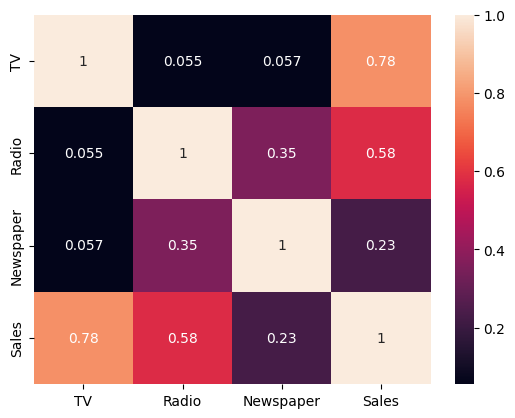

In [57]:
sns.heatmap(df.corr(), annot = True)
plt.show()

### VIF (Variance Inflation Factor)

In [60]:
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample dataset
data = {
    'Age': [25, 30, 35, 40, 45],
    'Experience': [2, 5, 7, 10, 12],
    'Salary': [30000, 40000, 50000, 60000, 70000]
}

df = pd.DataFrame(data)
df

,Age,Experience,Salary
0,25,2,30000
1,30,5,40000
2,35,7,50000
3,40,10,60000
4,45,12,70000


In [62]:
# Independent variables
X = df[['Age', 'Experience']]
X

,Age,Experience
0,25,2
1,30,5
2,35,7
3,40,10
4,45,12


In [64]:
# Add constant
X = add_constant(X)
X

,const,Age,Experience
0,1.0,25,2
1,1.0,30,5
2,1.0,35,7
3,1.0,40,10
4,1.0,45,12


In [67]:
# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif

,Feature
0,const
1,Age
2,Experience


In [68]:
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      Feature          VIF
0       const  1793.666667
1         Age   209.333333
2  Experience   209.333333
